<a href="https://colab.research.google.com/github/itinasharma/DeepLearning/blob/main/Transfer_Learning_Flowers_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow: 2.19.0
GPU: []
Using Colab cache for faster access to the 'flowers-recognition' dataset.

DATA DIR: /kaggle/input/flowers-recognition/flowers
Classes: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.
Class indices: {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}
Training samples: 3457
Validation samples: 860


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,121,733 (92.02 MB)

 Trainable params: 529,925 (2.02 MB)

 Non-trainable params: 23,591,808 (90.00 MB)

Epoch 1/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 544s 5s/step - accuracy: 0.4978 - loss: 1.4148 - val_accuracy: 0.8384 - val_loss: 0.4814
Epoch 2/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 543s 5s/step - accuracy: 0.8176 - loss: 0.4978 - val_accuracy: 0.8756 - val_loss: 0.3573
Epoch 3/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 538s 5s/step - accuracy: 0.8742 - loss: 0.3625 - val_accuracy: 0.8953 - val_loss: 0.3162
Epoch 4/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 534s 5s/step - accuracy: 0.8892 - loss: 0.3237 - val_accuracy: 0.8965 - val_loss: 0.3119
Epoch 5/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 531s 5s/step - accuracy: 0.9178 - loss: 0.2464 - val_accuracy: 0.8977 - val_loss: 0.3145
Epoch 6/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 522s 5s/step - accuracy: 0.9225 - loss: 0.2045 - val_accuracy: 0.9035 - val_loss: 0.2970
Epoch 7/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 517s 5s/step - accuracy: 0.9367 - loss: 0.1800 - val_accuracy: 0.8988 - val_loss: 0.3045
Epoch 8/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 515s 5s/step - accuracy: 0.9414 - loss: 0.1647 - val_accu

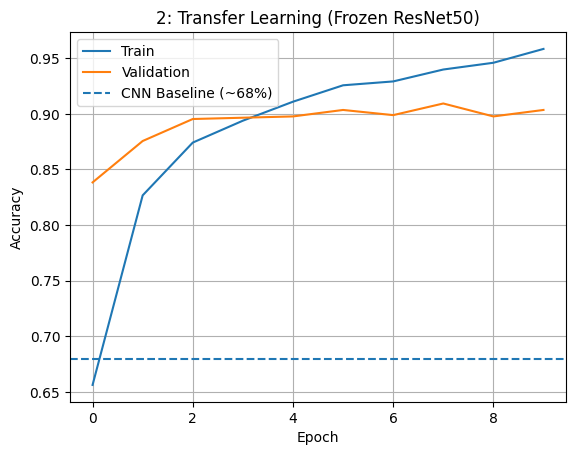

In [7]:
# =============================================================================
# 2 — TRANSFER LEARNING (FEATURE EXTRACTION ONLY)
# Flowers Recognition using ResNet50
# =============================================================================

# -----------------------------
# IMPORTS & SEEDS
# -----------------------------
import numpy as np
import tensorflow as tf
import random
import os
import matplotlib.pyplot as plt

np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

print("TensorFlow:", tf.__version__)
print("GPU:", tf.config.list_physical_devices("GPU"))

# -----------------------------
# DATASET (KAGGLEHUB)
# -----------------------------
import kagglehub

path = kagglehub.dataset_download("alxmamaev/flowers-recognition")
DATA_DIR = os.path.join(path, "flowers")

print("\nDATA DIR:", DATA_DIR)
print("Classes:", sorted(os.listdir(DATA_DIR)))

# -----------------------------
# CONFIG
# -----------------------------
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 5

# -----------------------------
# DATA GENERATORS
# (Correct preprocessing for ResNet50)
# -----------------------------
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

val_gen = val_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

print("Class indices:", train_gen.class_indices)
print("Training samples:", train_gen.samples)
print("Validation samples:", val_gen.samples)

# -----------------------------
# MODEL — TRANSFER LEARNING ONLY
# -----------------------------
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, optimizers

# Load pretrained ResNet50
base_model = ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)


base_model.trainable = False

# Build classifier head
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(NUM_CLASSES, activation="softmax")
])

# Compile
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# -----------------------------
# TRAINING
# -----------------------------
history = model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen,
    verbose=1
)

# -----------------------------
# EVALUATION
# -----------------------------
val_loss, val_acc = model.evaluate(val_gen, verbose=0)
train_acc = history.history["accuracy"][-1]

print("\n================ RESULTS ================")
print(f"Training Accuracy:   {train_acc*100:.2f}%")
print(f"Validation Accuracy: {val_acc*100:.2f}%")
print("========================================")

# -----------------------------
# VISUALIZATION
# -----------------------------
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Validation")
plt.axhline(0.68, linestyle="--", label="CNN Baseline (~68%)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("2: Transfer Learning (Frozen ResNet50)")
plt.legend()
plt.grid(True)
plt.show()
